In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
import tensorflow as tf
import cv2, os
import imutils

import warnings
warnings.filterwarnings('ignore')

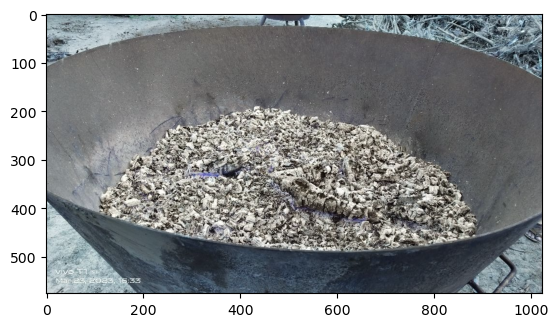

In [90]:
# read input image
image = cv2.imread('image1.jpeg')
plt.imshow(image)
plt.show()

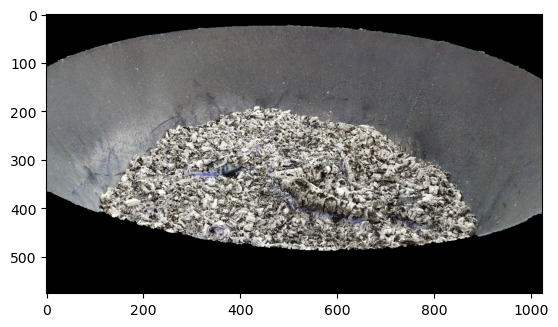

In [91]:
# define mask
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# define rectangle
rect = (0,0,1050,500)

# apply grabCut method to extract the foreground
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,20,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image*mask2[:,:,np.newaxis]

# display the extracted foreground image

plt.imshow(image)
plt.show()

In [92]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blurring image to remove noise
bgray = cv2.GaussianBlur(gray, (7, 7), 0)

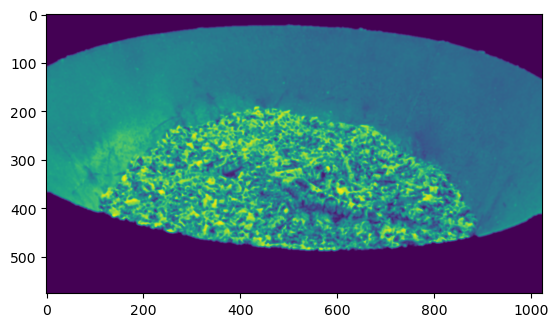

In [93]:
plt.imshow(bgray)
plt.show()

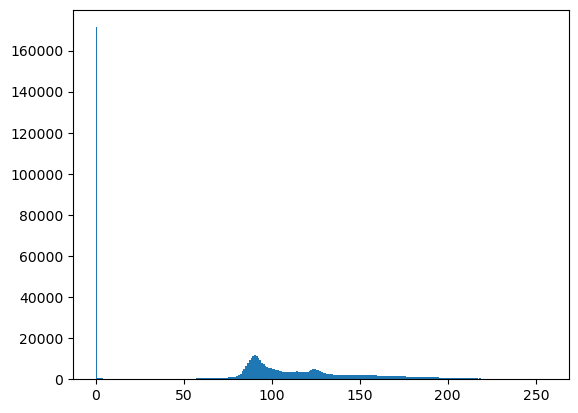

In [94]:
# draw histogram
plt.hist(bgray.ravel(), 256,[0, 256])
plt.show()

In [95]:
# Apply Canny edge detection
edges = cv2.Canny(bgray, 0, 85)

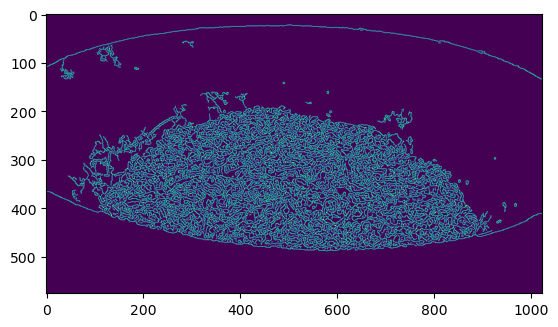

In [96]:
plt.imshow(edges)
plt.show()

In [97]:
# Finding Contours
# since findContours alters the image
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [98]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 1716


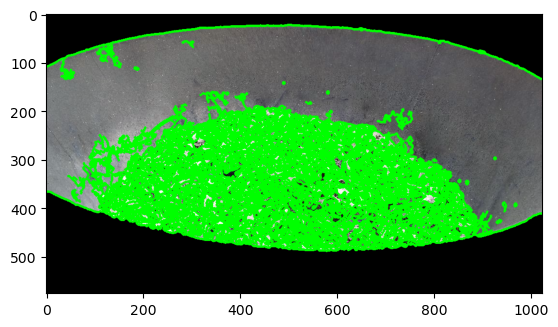

In [99]:
# Draw all contours
# -1 signifies drawing all contours
img1 = image.copy()
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)
  
plt.imshow(img1)
plt.show()

## Finding circumference of Container

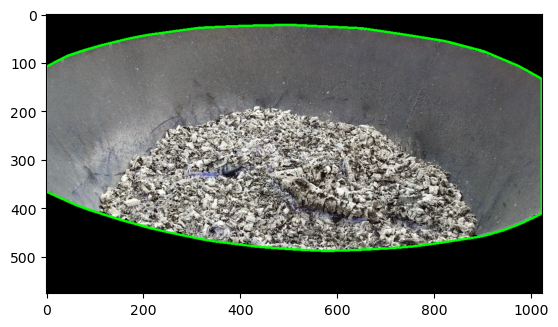

In [100]:
#Finding circumference of Container using convexHull

img2 = image.copy()

# Filter contours based on area
min_area_threshold = 0

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area_threshold:
        filtered_contours.append(contour)

# Combine all filtered contours into a single array
combined_contour = np.concatenate(filtered_contours)

# Find the convex hull of the combined contour
hull = cv2.convexHull(combined_contour)

# Draw the enclosing curve on the image
cv2.drawContours(img2, [hull], -1, (0, 255, 0), 3)

# Display the result
plt.imshow(img2)
plt.show()

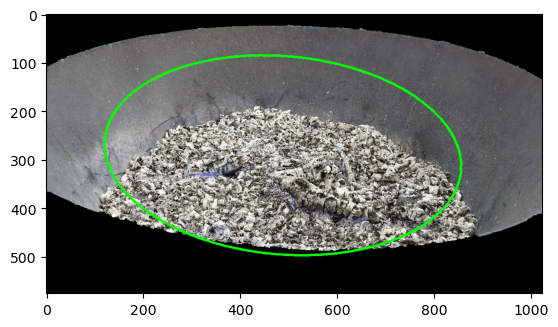

In [101]:
#Finding circumference of Container using fitEllipse
img3 = image.copy()

# Find the minimum enclosing ellipse
points = np.concatenate(combined_contour)
ellipse = cv2.fitEllipse(points)

# Draw the ellipse on the image
cv2.ellipse(img3, ellipse, (0, 255, 0), 3)

# Display the result
plt.imshow(img3)
plt.show()

<b>Here ConvexHull gives better result than fitEllipse. Hence choosing ConvexHull.

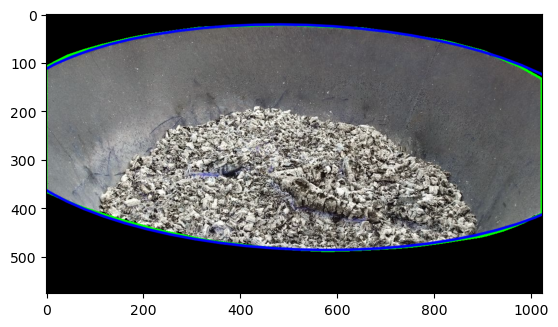

In [102]:
# Fit ellipse on the convex hull
ellipse = cv2.fitEllipse(hull)

# Draw the ellipse on the image
cv2.ellipse(img2, ellipse, (0, 0, 255), 3,cv2.LINE_AA)
# Display the result
plt.imshow(img2)
plt.show()

In [103]:
# Extract the dimensions of the ellipse enclosing convex hull
center, (major_axis, minor_axis), angle = ellipse

# Print the dimensions of ellipse enclosing convex hull
print("Dimensions of Fitted Ellipse:")
print("Major Axis Length:", max(major_axis, minor_axis))
print("Minor Axis Length:", min(major_axis, minor_axis))

Dimensions of Fitted Ellipse:
Major Axis Length: 1262.3988037109375
Minor Axis Length: 462.2299499511719


## Finding circumference of Filled matter

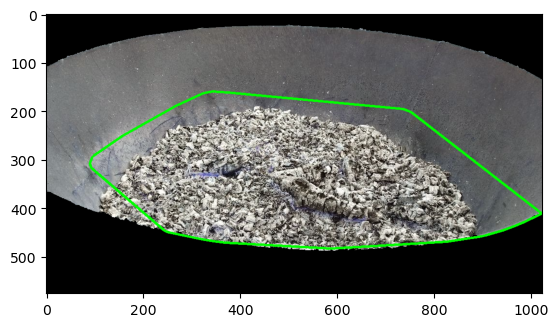

In [104]:
#Finding circumference of Filled matter using convexHull

img4 = image.copy()

# Filter contours based on area
min_area_threshold = 85

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area_threshold:
        filtered_contours.append(contour)

# Combine all filtered contours into a single array
combined_contour = np.concatenate(filtered_contours)

# Find the convex hull of the combined contour
hull = cv2.convexHull(combined_contour)

# Draw the enclosing curve on the image
cv2.drawContours(img4, [hull], -1, (0, 255, 0), 3)

# Display the result
plt.imshow(img4)
plt.show()

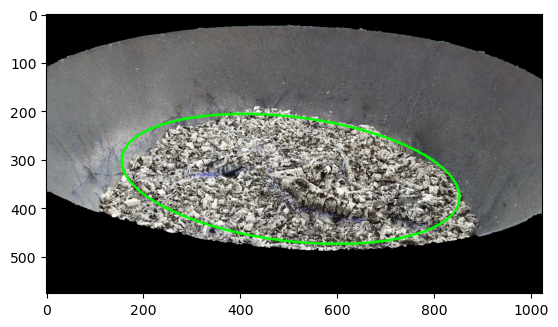

In [105]:
#Finding circumference of Filled matter using fitEllipse
img5 = image.copy()

# Find the minimum enclosing ellipse
points = np.concatenate(combined_contour)
ellipse = cv2.fitEllipse(points)

# Draw the ellipse on the image
cv2.ellipse(img5, ellipse, (0, 255, 0), 3)

# Display the result
plt.imshow(img5)
plt.show()

<B>Here fitEllipse gives better result than ConvexHull. Hence choosing fitEllipse.

In [106]:
# Extract the dimensions of the fitted ellipse
center, (major_axis, minor_axis), angle = ellipse

# Print the dimensions
print("Dimensions of Fitted Ellipse:")
print("Major Axis Length:", max(major_axis, minor_axis))
print("Minor Axis Length:", min(major_axis, minor_axis))

Dimensions of Fitted Ellipse:
Major Axis Length: 702.5150146484375
Minor Axis Length: 255.43235778808594


## Calculating the Percentage of Conical Container filled

Volume of cone = pi* r^2 * h/3 <br><br>
If 2 cones have same angle and radius is known then the ratio of the perpendicular height will be:<br>
<center>h1/h2 = r1/r2<br><br>
</center>Volume of cone container filled/ Volume of filled matter = (r1/r2)^3 = (2*r1/2*r2)<br>= (702.5150146484375/1262.3988037109375)

## Percentage of filled container = 55.65 %

### Points to Note:<br>
1. Since The radius which we have taken is perpendicular to the camera viewpoint. Which means radius does not change because of camera angle.<br>
<b>Hence our result is independent of camera angle.<br><br>
2. We have used only Ellipse and Convex Hull for bounding the contours. It can be made more accurate by using better alternatives. Furthermore we can take <b>average</b> of multiple images of same object to make it more accurate.<br>